<a href="https://colab.research.google.com/github/fakehaa/ML-PR/blob/main/MLPR_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5A: Cat & Dogs CNN Based

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
#check the current directory
!pwd


/content/drive/MyDrive


In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, InputLayer, Conv2D, MaxPool2D
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt


In [ ]:
train_path="cat-dog-dataset/train"
test_path="cat-dog-dataset/test"
val_path="cat-dog-dataset/val"


In [ ]:
import os
import cv2
x_train=[]
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(64,64))
        x_train.append(img_arr)


In [ ]:
image_path

'cat-dog-dataset/train/cat/cat.1186.jpg'

In [ ]:
x_test=[]
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(64,64))
        x_test.append(img_arr)


In [ ]:
x_val=[]
for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(64,64))
        x_val.append(img_arr)


In [ ]:
# Import the NumPy module
import numpy as np
# Convert the lists into NumPy arrays
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)


In [ ]:
test_x=test_x/255.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,target_size = (64, 64), batch_size = 32, class_mode = 'sparse')

Found 5003 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path, target_size = (64, 64), batch_size = 32, class_mode = 'sparse')

Found 1610 images belonging to 2 classes.


In [ ]:
val_set = val_datagen.flow_from_directory(val_path, target_size = (64, 64), batch_size = 32, class_mode = 'sparse')

Found 400 images belonging to 2 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes


In [ ]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape


((5003,), (1610,), (400,))

In [ ]:
labels = {value: key for key, value in training_set.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")


Label Mappings for classes present in the training and validation datasets

0 : cat
1 : dog


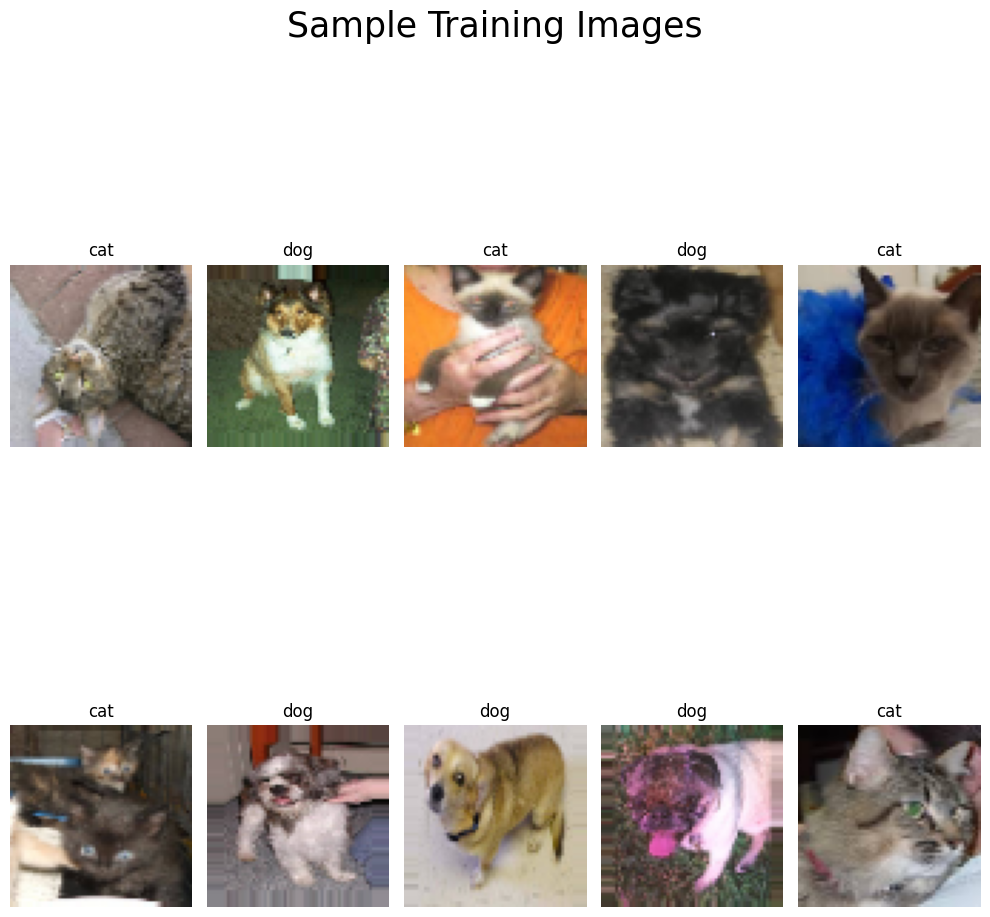

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 12))
idx = 0
for i in range(2):
    for j in range(5):
        #label = labels[np.argmax(training_set[0][1][idx])]
        label = labels[training_set[0][1][idx]]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(training_set[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1
plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=25)
plt.show()


In [27]:
import tensorflow as tf
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Input(shape = [64, 64, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=5, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=2, activation='softmax'))
cnn.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 5)         140       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 5)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        1472      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [28]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [29]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
early_stopping_monitor = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
#Early stopping to avoid overfitting of model


In [30]:
model_file = 'best_cnn_model.keras'

In [31]:
model_check_point = ModelCheckpoint(model_file, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [32]:
# fit the model
history = cnn.fit(
 training_set,
  validation_data=val_set ,
  epochs=10,
  callbacks=[early_stopping_monitor, model_check_point],
  batch_size=32,shuffle=True)


Epoch 1/10
157/157 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5627
Epoch 1: val_loss improved from inf to 0.64535, saving model to best_cnn_model.keras
157/157 [==============================] - 51s 316ms/step - loss: 0.6856 - accuracy: 0.5627 - val_loss: 0.6454 - val_accuracy: 0.6125
Epoch 2/10
157/157 [==============================] - ETA: 0s - loss: 0.6338 - accuracy: 0.6366
Epoch 2: val_loss improved from 0.64535 to 0.60805, saving model to best_cnn_model.keras
157/157 [==============================] - 52s 332ms/step - loss: 0.6338 - accuracy: 0.6366 - val_loss: 0.6081 - val_accuracy: 0.6825
Epoch 3/10
157/157 [==============================] - ETA: 0s - loss: 0.6004 - accuracy: 0.6746
Epoch 3: val_loss improved from 0.60805 to 0.59897, saving model to best_cnn_model.keras
157/157 [==============================] - 49s 311ms/step - loss: 0.6004 - accuracy: 0.6746 - val_loss: 0.5990 - val_accuracy: 0.6650
Epoch 4/10
157/157 [===========================

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
# Plot the accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()



In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


In [ ]:
from keras.models import load_model
model = load_model('best_cnn_model.keras')


In [ ]:
# Evaluate the model on the test data
model.evaluate(test_set, batch_size=32)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred, test_y))
#get confusion matrix
print(confusion_matrix(y_pred,test_y))


In [ ]:
predictions = model.predict(test_x)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(24, 20))
idx = 860
for i in range(2):
    for j in range(6):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_x[idx])
        ax[i, j].axis("off")
        idx += 1
plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()


# Lab 5b: Cat and Dog VGG Based

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
!pwd

/content/drive/MyDrive


In [4]:
!pip install keras

In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt


In [6]:
train_path="cat-dog-dataset/train"
test_path="cat-dog-dataset/test"
val_path="cat-dog-dataset/val"


In [7]:
import os
import cv2
x_train=[]
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)


In [8]:
image_path

'cat-dog-dataset/train/cat/cat.1186.jpg'

In [9]:
x_test=[]
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)


In [10]:
x_val=[]
for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)


In [11]:
# Import the NumPy module
import numpy as np
# Convert the lists into NumPy arrays
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)


In [12]:
test_x=test_x/255.0

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,target_size = (224, 224), batch_size = 32, class_mode = 'sparse')


Found 5003 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory(test_path, target_size = (224, 224), batch_size = 32, class_mode = 'sparse')

Found 1610 images belonging to 2 classes.


In [15]:
val_set = val_datagen.flow_from_directory(val_path, target_size = (224, 224), batch_size = 32, class_mode = 'sparse')

Found 400 images belonging to 2 classes.


In [16]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes


In [17]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape


((5003,), (1610,), (400,))

In [18]:
labels = {value: key for key, value in training_set.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")


Label Mappings for classes present in the training and validation datasets

0 : cat
1 : dog


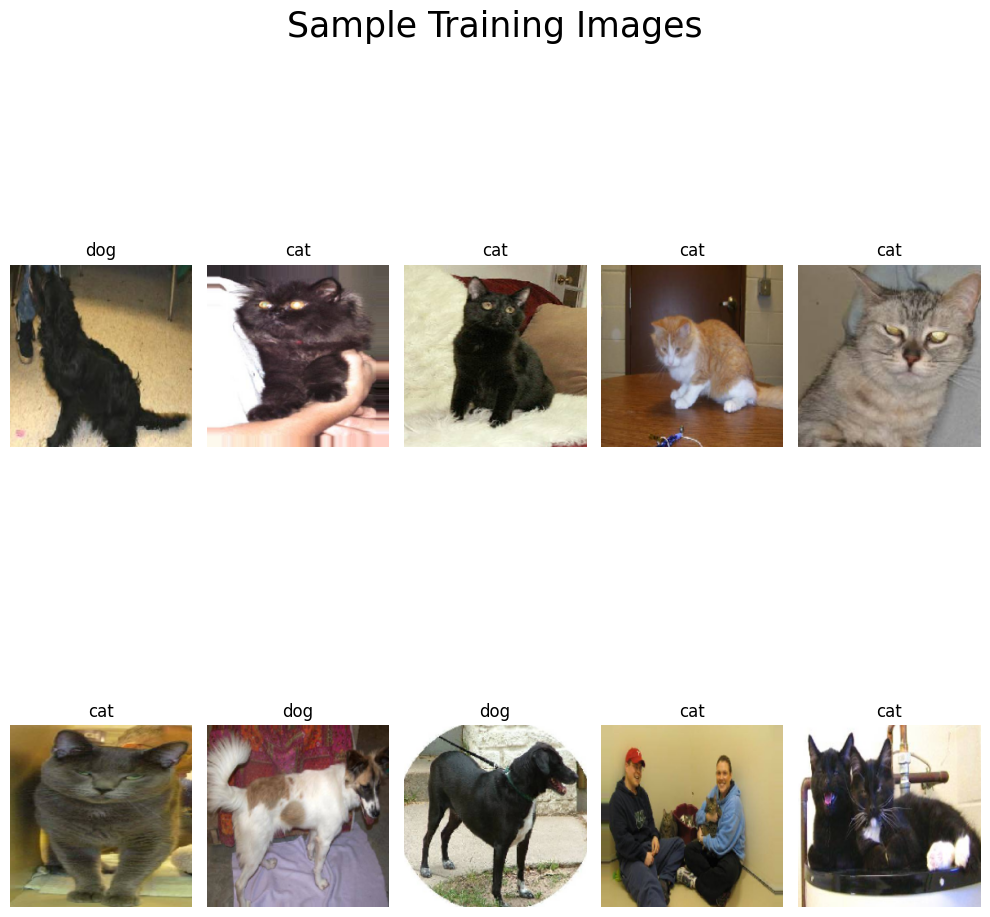

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 12))
idx = 0
for i in range(2):
    for j in range(5):
        label = labels[training_set[0][1][idx]]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(training_set[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1
plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=25)
plt.show()


###Building the vgg model

In [20]:
from tensorflow.keras.applications import VGG19

vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False


80134624/80134624 [==============================] - 2s 0us/step


In [21]:
from tensorflow.keras.layers import Flatten
x = Flatten()(vgg.output)


In [22]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(2, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)


In [23]:
# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [24]:
model.compile( loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)


In [25]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
early_stopping_monitor = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
#Early stopping to avoid overfitting of model


In [26]:
model_file = 'best_vgg_model.keras'

In [27]:
model_check_point = ModelCheckpoint(model_file, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [28]:
# fit the model
history = model.fit(
 training_set,
  validation_data=val_set ,
  epochs=3,
  callbacks=[early_stopping_monitor, model_check_point],
  batch_size=32,shuffle=True)


Epoch 1/3
157/157 [==============================] - ETA: 0s - loss: 0.3953 - accuracy: 0.8363
Epoch 1: val_loss improved from inf to 0.29168, saving model to best_vgg_model.keras
157/157 [==============================] - 124s 596ms/step - loss: 0.3953 - accuracy: 0.8363 - val_loss: 0.2917 - val_accuracy: 0.8550
Epoch 2/3
157/157 [==============================] - ETA: 0s - loss: 0.2410 - accuracy: 0.8993
Epoch 2: val_loss improved from 0.29168 to 0.25501, saving model to best_vgg_model.keras
157/157 [==============================] - 90s 569ms/step - loss: 0.2410 - accuracy: 0.8993 - val_loss: 0.2550 - val_accuracy: 0.8900
Epoch 3/3
157/157 [==============================] - ETA: 0s - loss: 0.2230 - accuracy: 0.9059
Epoch 3: val_loss did not improve from 0.25501
157/157 [==============================] - 86s 549ms/step - loss: 0.2230 - accuracy: 0.9059 - val_loss: 0.2897 - val_accuracy: 0.8625


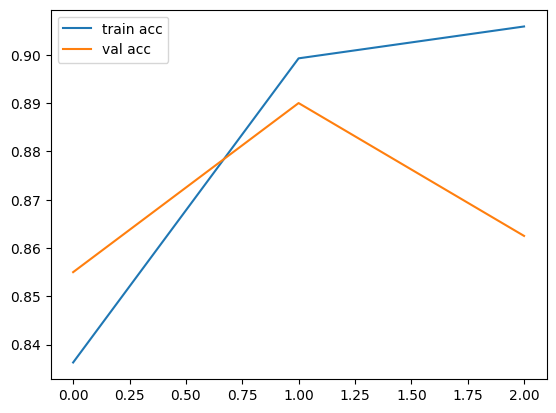

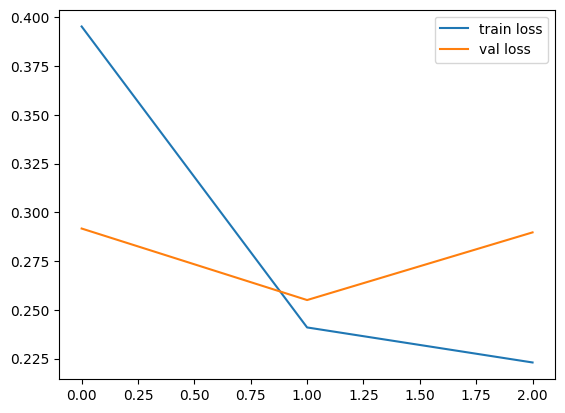

In [29]:
# Import the necessary modules
import matplotlib.pyplot as plt
# Plot the accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


In [30]:
from keras.models import load_model
model = load_model('best_vgg_model.keras')


In [31]:
# Evaluate the model on the test data
model.evaluate(test_set, batch_size=32)


51/51 [==============================] - 12s 230ms/step - loss: 0.2791 - accuracy: 0.8950


[0.2791198492050171, 0.8950310349464417]

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred, test_y))
#get confusion matrix
print(confusion_matrix(y_pred,test_y))


51/51 [==============================] - 8s 162ms/step
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       917
           1       0.82      0.96      0.88       693

    accuracy                           0.89      1610
   macro avg       0.89      0.90      0.89      1610
weighted avg       0.90      0.89      0.89      1610

[[772 145]
 [ 28 665]]


In [33]:
predictions = model.predict(test_x)

51/51 [==============================] - 8s 159ms/step


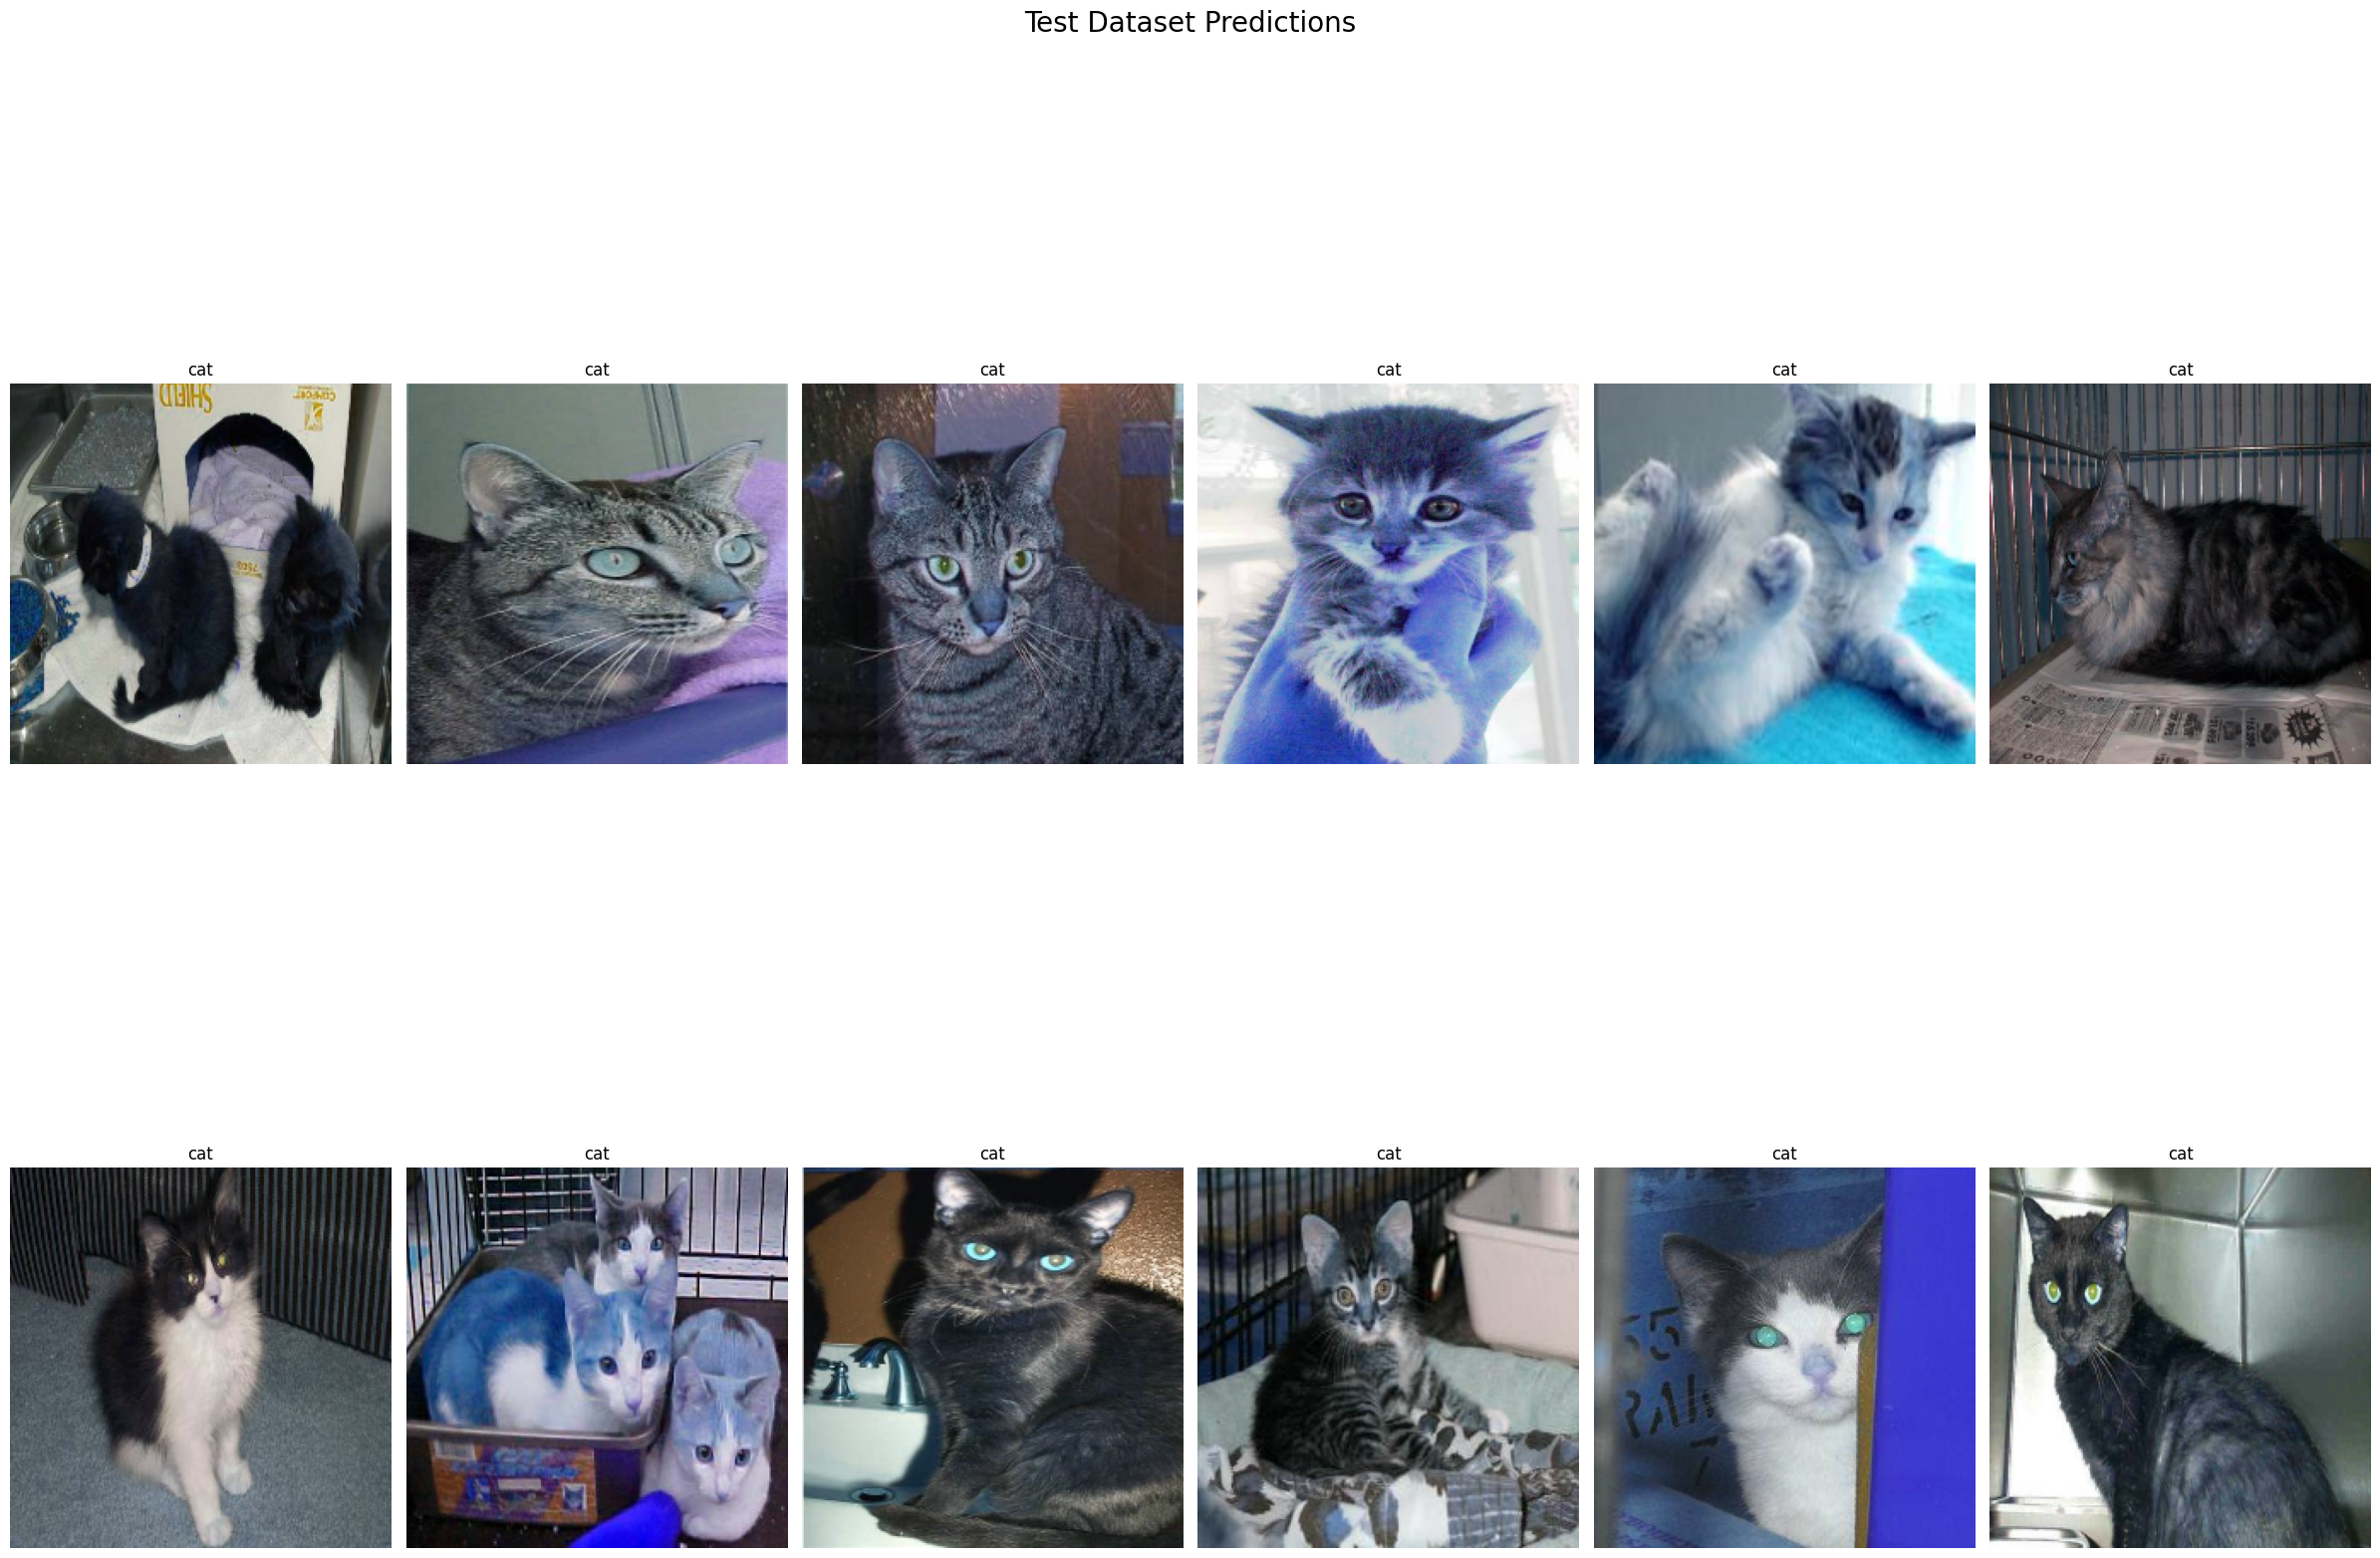

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(24, 20))
idx = 10
for i in range(2):
    for j in range(6):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_x[idx])
        ax[i, j].axis("off")
        idx += 1
plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()
